In [50]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import math
import itertools
from mpl_toolkits.mplot3d import Axes3D
from mlrefined_libraries import math_optimization_library as optlib
static_plotter = optlib.static_plotter.Visualizer();


3.1
![avatar](./pic/3-1-1.png)


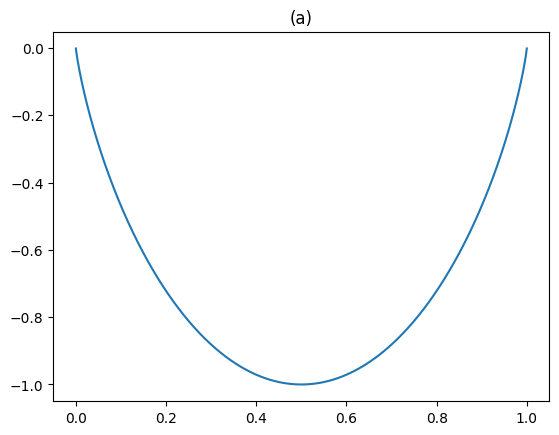

In [133]:
g1=lambda w: w*np.log2(w)+(1-w)*np.log2(1-w)
g2=lambda w: np.log2(1+np.exp(w))
g3=lambda w: w*np.tanh(w)
C=np.array([[2,1],[1,3]])
B=np.array([[1],[1]])
g4=lambda w: 1/2*np.dot(np.dot(w.T,C),w)+np.dot(B.T,w)
w1=np.linspace(0,1,10000)
plt.plot(w1,g1(w1))
plt.title("(a)")
plt.show()

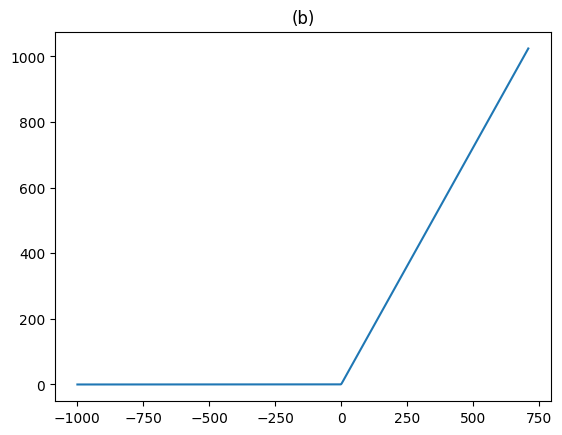

In [135]:
w2=np.linspace(-1000,1000,10000000)
plt.title("(b)")
plt.plot(w2,g2(w2))
plt.show()

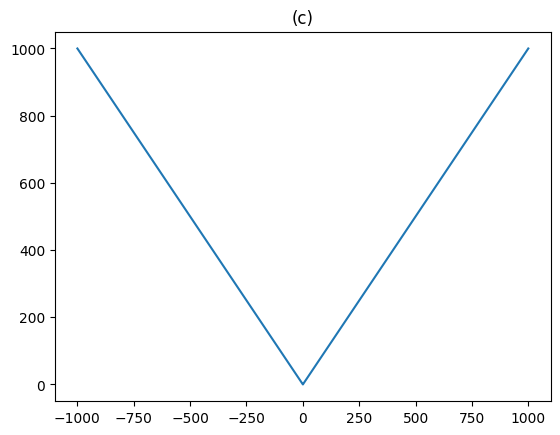

In [53]:
w3=np.linspace(-1000,1000,10000000)
plt.plot(w3,g3(w3))
plt.title("(c)")
plt.show()

X: (100, 100)
Y: (100, 100)
(10000,)
(10000, 1)


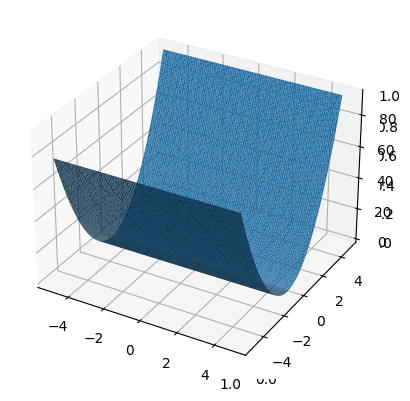

In [132]:
fig4 = plt.figure()
ax4 = plt.axes(projection='3d')
xx = np.arange(-5,5,0.1)
yy = np.arange(-5,5,0.1)
X, Y = np.meshgrid(xx, yy)
print("X:",X.shape)
print("Y:",Y.shape)
print(X.flatten().shape)
w4=[]
for i in range(len(xx)):
    for j in range(len(yy)):
        w4.append(np.array([xx[i],yy[i]]))        
y4=[g4(w) for w in w4]
y4=np.array(y4)
print(y4.shape)
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), y4.flatten(), linewidth=0.2, antialiased=True) #flatten all the arrays here
plt.show()

3.3
![avator](./pic/3.3.png)

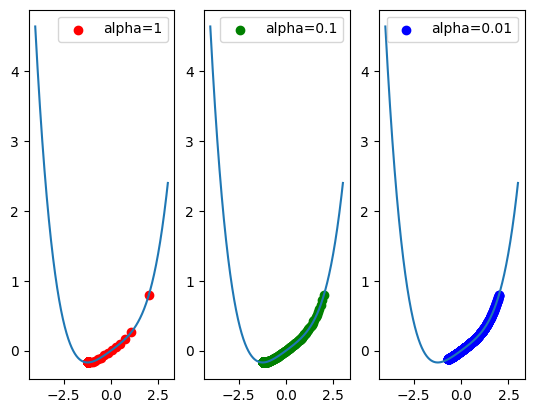

In [168]:
#3.5
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(alpha,max_its,w):
    cost_history = [g(w)]  
    wset=[w]
    for k in range(1,max_its+1):       
        grad_eval=grad(w)
        w=w-alpha*grad_eval
        cost_history.append(g(w))  
        wset.append(w)
    return wset,cost_history
g = lambda w: 1/50*(w**4 + w**2 + 10*w)
grad = lambda w: 1/50*(4*w**3 + 2*w + 10)
x=np.linspace(-4,3,100000)
w = 2.0
max_its = 1000

alpha = 10**(0)
w_1,cost_1 = gradient_descent(alpha,max_its,w)

alpha = 10**(-1)
w_2,cost_2 = gradient_descent(alpha,max_its,w)

alpha = 10**(-2)
w_3,cost_3 = gradient_descent(alpha,max_its,w)
plt.subplot(1,3,1)
plt.plot(x,g(x))
plt.scatter(w_1,cost_1,color='r',label='alpha=1')
plt.legend()
plt.subplot(1,3,2)
plt.plot(x,g(x))
plt.scatter(w_2,cost_2,color='g',label='alpha=0.1')
plt.legend()
plt.subplot(1,3,3)
plt.plot(x,g(x))
plt.scatter(w_3,cost_3,color='b',label='alpha=0.01')
plt.legend()
plt.show()
plt.ExitStack()

when alpha is 0.1 it seems better to get the minimum value

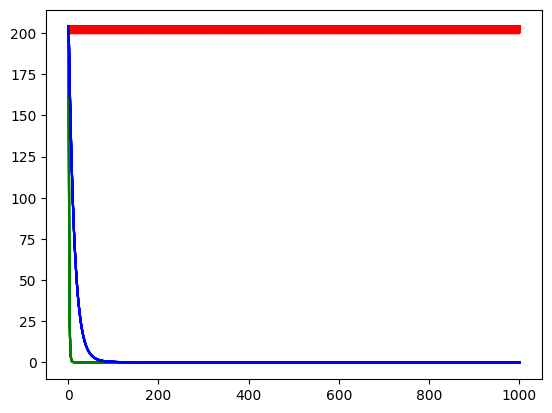

In [179]:
#3.8
grad=lambda w:2*w
w=np.array([10]*10)
alpha = 10**(0)
w_1,cost_1 = gradient_descent(alpha,max_its,w)
w=np.array([10]*10)
alpha = 10**(-1)
w_2,cost_2 = gradient_descent(alpha,max_its,w)
w=np.array([10]*10)
alpha = 10**(-2)
w_3,cost_3 = gradient_descent(alpha,max_its,w)
t=np.arange(1,max_its+2,1)
ax=plt.figure()
plt.plot(t,cost_1,color='r',label='alpha=1')
plt.plot(t,cost_2,color='g',label='alpha=0.1')
plt.plot(t,cost_3,color='b',label='alpha=0.01')
ax.show()

If we choose alpha to be 1, the function never converge. When choose alpha=0.1, it converge faster than use alpha=0.01